# Track Trending Topic on Twitter

### Download Tweets

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
import pandas as pd
import datetime
 
consumer_key = 'xxxx'
consumer_secret = 'xxxx'
access_token = 'xxxx'
access_secret = 'xxxx'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
 
message,favorite_count,retweet_count,created_at,user_name,screen_name,favourites_count,description,friends_count,followers_count,location=[],[],[],[],[],[],[],[],[],[],[]

for status in tweepy.Cursor(api.search, q='North Korea -filter:retweets').items(5000): #search by keyword, filter retweet
    message.append(status.text)
    favorite_count.append(status.favorite_count)
    retweet_count.append(status.retweet_count)
    created_at.append(status.created_at)
    user_name.append(status.user.name)
    screen_name.append(status.user.screen_name)
    favourites_count.append(status.user.favourites_count)
    description.append(status.user.description)
    friends_count.append(status.user.friends_count)
    followers_count.append(status.user.followers_count)
    location.append(status.user.location)
    
df4=pd.DataFrame({'Message':message,
                'Tweet Favorite Count':favorite_count,
                'Retweet Count':retweet_count,
                'Created At':created_at,
                'Username':user_name,
                'Handle':screen_name,
                'Likes':favourites_count,
                'User Description':description,
                'Following':friends_count,
                'Followers':followers_count,
                'Location':location})
pd.DataFrame(df4).to_excel('North Korea.xlsx', header=True, index=True)
display(df4) 

In [4]:
import pandas as pd
df4 = pd.read_excel('North Korea.xlsx') #load the data from saved file

# North Korea

#### Text Cleaning

In [2]:
df4['tweets_clean'] = df4['Message'].apply(lambda x: " ".join(x.lower() for x in str(x).split())) #lower case
df4['tweets_clean'] = df4['tweets_clean'].str.replace('[^\w\s]','') #removes punctuation

In [3]:
df4['word_count'] = df4['tweets_clean'].apply(lambda x: len(str(x).split(" "))) #descriptive stats to understand data - returns word count
df4['unique word_count'] = df4['tweets_clean'].apply(lambda x: len(set(str(x).split(" ")))) #unique word count
df4['char_count'] = df4['tweets_clean'].str.len() #character count by tweet

#### TextBlob Sentiment Analysis - Subjectivity

In [ ]:
from textblob import TextBlob

def sentiment_subjectivity(text):
    try:
        return TextBlob(text).sentiment.subjectivity
    except:
        return None
    
df4['subjectivity'] = df4['tweets_clean'].map(lambda text: TextBlob(text).sentiment.subjectivity)

#### TextBlob Sentiment Analysis - Polarity

In [6]:
from textblob import TextBlob

def sentiment_polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
    
df4['polarity'] = df4['tweets_clean'].map(lambda text: TextBlob(text).sentiment.polarity)

## Sentiment Analysis - Histogram, Pie Chart, Word Cloud

In [7]:
df4['subjectivity'].value_counts().head(10)

0.000000    2108
0.333333     357
1.000000     278
0.500000     277
0.100000      95
0.166667      93
0.750000      89
0.400000      79
0.900000      77
0.200000      60
Name: subjectivity, dtype: int64

Text(0,0.5,'Frequency')

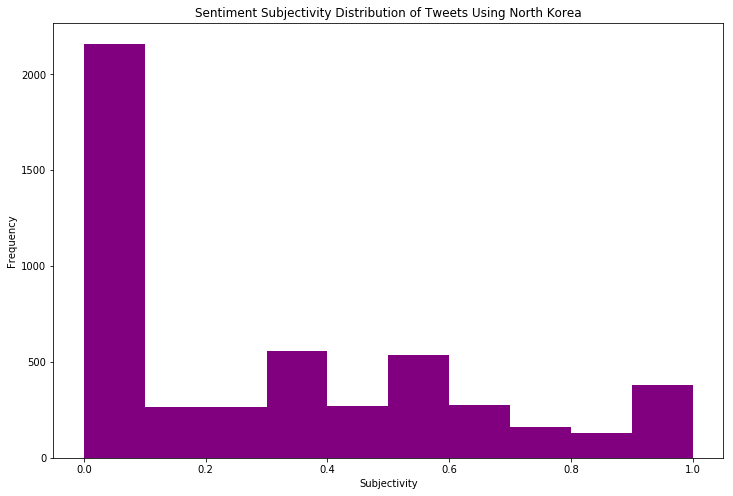

In [9]:
import numpy as np
import matplotlib.pyplot as plt
ax = df4['subjectivity'].plot.hist(figsize=(12, 8), color='purple')
ax.set_title('Sentiment Subjectivity Distribution of Tweets Using North Korea')
ax.set_xlabel('Subjectivity')
ax.set_ylabel('Frequency')

##### Polarity analysis on segement with objective tweets filtered out

In [11]:
subjective = df4[df4['subjectivity'] != 0]
#filtered out 0 for objective tweets

In [12]:
from textblob import TextBlob
def sentiment_polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
    
subjective['polarity'] = subjective['tweets_clean'].map(lambda text: TextBlob(text).sentiment.polarity)

subjective['polarity'].value_counts()

/home/ariggs/myENV/lib/python3.5/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


 0.250000    429
 0.000000    291
 0.500000    157
 0.125000    111
 0.200000    101
-0.500000     60
 0.800000     58
 0.100000     57
 0.333333     49
 0.136364     46
 0.400000     46
-0.125000     39
-0.250000     35
 0.600000     33
-0.300000     32
-0.400000     31
 0.350000     31
-0.100000     30
 0.375000     30
 0.300000     30
 1.000000     29
-0.200000     29
 0.285714     27
-1.000000     25
 0.700000     24
 0.187500     24
-0.050000     21
 0.166667     20
-0.600000     18
-0.166667     18
            ... 
 0.341667      1
-0.051852      1
 0.092857      1
 0.305556      1
 0.293750      1
 0.256566      1
 0.095238      1
 0.450000      1
 0.159524      1
-0.056250      1
-0.056818      1
-0.112500      1
-0.104167      1
 0.272727      1
-0.002976      1
-0.070833      1
 0.308333      1
 0.141667      1
 0.283333      1
-0.337500      1
-0.350000      1
-0.178571      1
 0.126667      1
-0.062500      1
 0.268182      1
-0.249167      1
-0.181818      1
 0.193182     

Text(0,0.5,'Frequency')

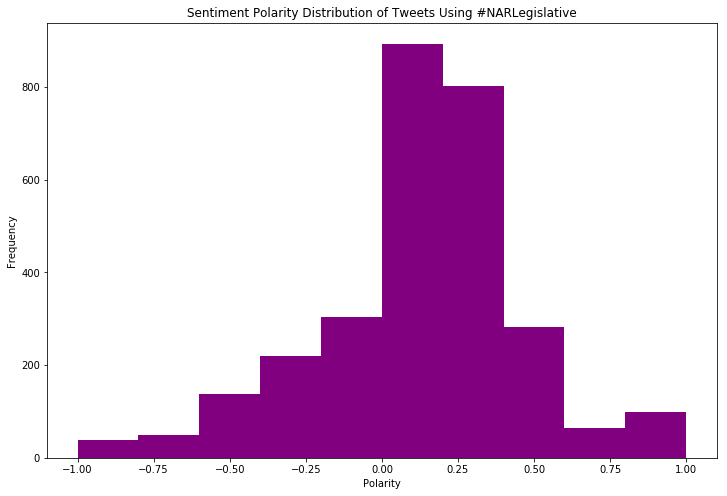

In [13]:
import numpy as np
import matplotlib.pyplot as plt
ax = subjective['polarity'].plot.hist(figsize=(12, 8), color='purple')
ax.set_title('Sentiment Polarity Distribution of Tweets Using #NARLegislative')
ax.set_xlabel('Polarity')
ax.set_ylabel('Frequency')

##### To compare, polarity analysis on all tweets before subjectivity analysis was run

In [14]:
df4['polarity'].value_counts().head(10)

 0.000000    2390
 0.250000     429
 0.500000     157
 0.125000     111
 0.200000     101
-0.500000      60
 0.800000      58
 0.100000      57
 0.333333      49
 0.400000      46
Name: polarity, dtype: int64

Text(0,0.5,'Frequency')

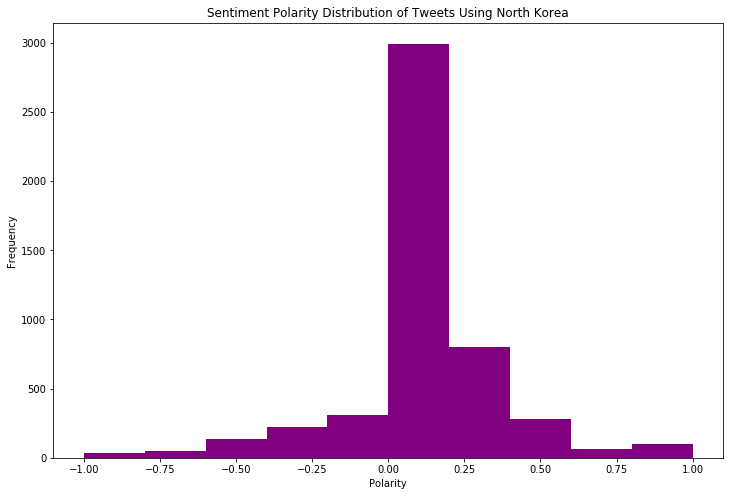

In [15]:
import numpy as np
import matplotlib.pyplot as plt
ax = df4['polarity'].plot.hist(figsize=(12, 8), color='purple')
ax.set_title('Sentiment Polarity Distribution of Tweets Using North Korea')
ax.set_xlabel('Polarity')
ax.set_ylabel('Frequency')

In [16]:
df4['subjectivity'].value_counts().head(10)

0.000000    2108
0.333333     357
1.000000     278
0.500000     277
0.100000      95
0.166667      93
0.750000      89
0.400000      79
0.900000      77
0.200000      60
Name: subjectivity, dtype: int64

In [38]:
df4['subjectivity_range'] = pd.cut(df4['subjectivity'],bins=[0,.667,.9,1], labels=['Objective','Somewhat subjective','Very Subjective'])
sub2 = df4['subjectivity_range'].value_counts()
sub2

Objective              2119
Somewhat subjective     468
Very Subjective         305
Name: subjectivity_range, dtype: int64

#### Subjectivity Pie Chart

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe64b69c9b0>],
      dtype=object)

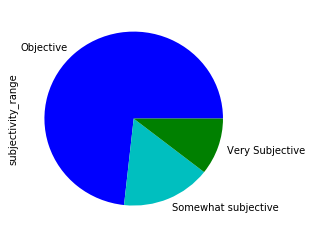

In [39]:
sub2.plot(kind='pie', subplots=True, figsize=(4, 4), colors=['b', 'c', 'g'])

#### Polarity Pie Chart with Objective Tweets Filtered Out

In [40]:
subjective['polarity_range'] = pd.cut(subjective['polarity'],bins=[-1,-.1,0,1], labels=['Negative','Neutral','Positive'])
pol1 = subjective['polarity_range'].value_counts()
pol1

/home/ariggs/myENV/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Positive    1852
Negative     602
Neutral      413
Name: polarity_range, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe64b6c1cc0>],
      dtype=object)

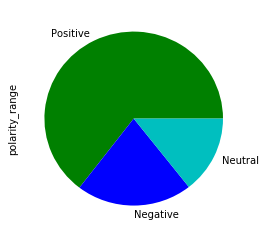

In [41]:
pol1.plot(kind='pie', subplots=True, figsize=(4, 4), colors=['g', 'b', 'c'])

#### Polairty Pie Chart of All Tweets

In [42]:
df4['polarity_range'] = pd.cut(df4['polarity'],bins=[-1,-.1,0,1], labels=['Negative','Neutral','Positive'])
pol2 = df4['polarity_range'].value_counts()
pol2

Neutral     2514
Positive    1852
Negative     609
Name: polarity_range, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe64b6691d0>],
      dtype=object)

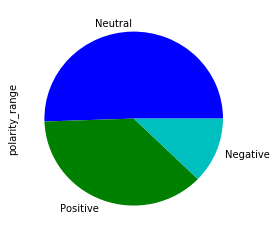

In [43]:
pol2.plot(kind='pie', subplots=True, figsize=(4, 4), colors=['b', 'g', 'c'])

### Exploring Negative Tweets

In [44]:
negative = df4.loc[df4['polarity_range'] == 'Negative'] #df4 of all tweets (609 total)

In [45]:
negative['Message']

4       @Jaz_manianDevil You’re going to totally ignor...
6       @tedlieu @POTUS @realDonaldTrump Donald J. Tru...
14      Trump is a profoundly corrupt, morally squalid...
26      @victoriastudio2 @DavidNakamura @mariasacchett...
30      @RepDonBeyer You mean the North Korea that Dem...
33      "PRESIDENT" TRUMP ENTERED NORTH KOREA ILLEGALL...
35      Anyone else notice that Trump just illegally c...
40      @NoWay7790 @realDonaldTrump Then MOVE to Venez...
41      @Purrcival1 @martyn_williams You mean the book...
53      Dibs on writing the Trump In North Korea opera...
57      @michaelbeatty3 @dianne1h @realDonaldTrump @Ma...
70      @RadioFreeTom Can I make a statement that Nobo...
72      @diana_declue @mitchellreports @MSNBC Name one...
76      Honor?? Makes me sick #TrumpKim meets Kim Jong...
77      Its annoying watching liberals turn into hawks...
85      Those who are criticising The Worm for meeting...
90      @backroads_linda @MikeGravel North Korea has s...
112     @GOP @

In [46]:
positive = df4.loc[df4['polarity_range'] == 'Positive'] #df4 positive tweets (1852)

In [47]:
positive['tweets_clean']

1       stephanie grisham the new white house press se...
2       seekero94290382 gop realdonaldtrump its not ha...
7       washtimes a little bruised and hurt are differ...
10      gopchairwoman realdonaldtrump im old enough to...
11      kamalaharris so kamala harris wants to go to w...
13      dennis rodman is still the most mature adminis...
15      goldengateblond wikipedia love letter diplomac...
19      infinityday257 this crooked administration is ...
20      realdonaldtrump i dont agree with most of what...
23      sauterrory here you go rory kju tortures impri...
25      georgevassilas realdonaldtrump be thankful you...
29      kamalaharris trump goes to north korea to try ...
31      raheemkassam trump demonstrated to an enemy th...
36      realdonaldtrump great handshake in north korea...
39      trump meets kim jong un becomes first sitting ...
42      new press secretary stephanie grisham bruised ...
44      europe trump first us president to set foot in...
47      wonder

#### Unigrams in negative tweets

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(negative['tweets_clean'], 50)
for word, freq in common_words:
    print(word, freq)

north 397
korea 360
trump 183
president 90
realdonaldtrump 83
kim 56
just 39
like 38
donald 31
obama 28
dont 28
jong 27
bad 26
dictator 25
potus 25
meeting 23
koreas 23
know 23
hes 21
way 21
did 21
news 21
stupid 21
didnt 20
mean 19
time 19
trumps 19
history 19
nuclear 18
historic 18
trying 17
otto 17
think 17
sad 17
people 17
brutal 17
hate 16
kamalaharris 16
peace 16
world 15
war 15
ewarren 15
step 15
code 15
shit 14
going 14
idiot 14
photo 13
got 13
remember 13


#### Unigrams in positive tweets

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(positive['tweets_clean'], 50)
for word, freq in common_words:
    print(word, freq)

north 1384
korea 1291
trump 838
president 667
sitting 267
kim 263
realdonaldtrump 224
step 205
foot 174
jong 131
set 125
history 104
trumps 100
donald 93
great 92
just 88
meets 88
dmz 73
news 72
meeting 70
potus 70
enter 68
obama 68
new 66
good 65
like 64
steps 64
people 62
american 61
leader 59
strategy 58
historic 58
right 58
prize 57
love 56
nobel 53
peace 53
youtube 51
korean 50
press 49
diplomacy 49
koreas 49
war 47
dont 47
visit 47
amp 45
better 44
im 44
nuclear 43
harry 42


## Most Common Ngrams Found in Tweets

In [ ]:
import nltk
nltk.download('punkt')

In [50]:
import nltk
from nltk.tokenize import word_tokenize

tweets = df4.tweets_clean.str.cat(sep=' ')

#function to split text into word
tokens = word_tokenize(tweets)

vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

12862


['north',
 'korea',
 'to',
 'the',
 'trump',
 'a',
 'in',
 'and',
 'is',
 'president',
 'with',
 'of',
 'into',
 'kim',
 'for',
 'us',
 'you',
 'realdonaldtrump',
 'first',
 'that',
 'i',
 'he',
 'on',
 'it',
 'this',
 'was',
 'becomes',
 'sitting',
 'jong',
 'un',
 'be',
 'what',
 'not',
 'has',
 'have',
 'are',
 'step',
 'meeting',
 'as',
 'we',
 'at',
 'his',
 'so',
 'if',
 'just',
 'trumps',
 'all',
 'history',
 'would',
 'foot']

In [51]:
from stop_words import get_stop_words
stop_words = get_stop_words('en')

In [52]:
#top 100 words without stop words
tokens_2 = [w for w in tokens if not w in stop_words]
frequency_dist = nltk.FreqDist(tokens_2)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:100]

['north',
 'korea',
 'trump',
 'president',
 'kim',
 'us',
 'realdonaldtrump',
 'first',
 'becomes',
 'sitting',
 'jong',
 'un',
 'step',
 'meeting',
 'just',
 'trumps',
 'history',
 'foot',
 'obama',
 'donald',
 'like',
 'steps',
 'nuclear',
 'press',
 'potus',
 'koreas',
 'meets',
 'will',
 'via',
 'dmz',
 'set',
 'peace',
 'can',
 'news',
 'war',
 'secretary',
 'historic',
 'people',
 'dont',
 'visit',
 'go',
 'get',
 'now',
 'one',
 'leader',
 'democratic',
 'american',
 'amp',
 'otto',
 'korean',
 'bruised',
 'jongun',
 'hes',
 'dictator',
 'going',
 'south',
 'nothing',
 'stephanie',
 'think',
 'makes',
 'great',
 'grisham',
 'know',
 'security',
 'enter',
 'see',
 'says',
 'candidates',
 'diplomacy',
 'made',
 'china',
 'talks',
 'warmbier',
 '1st',
 'time',
 'white',
 'making',
 'world',
 'said',
 'want',
 'kamalaharris',
 'whitehouse',
 'im',
 'prize',
 'photo',
 'iran',
 'house',
 'never',
 'russia',
 'nobel',
 'ewarren',
 'way',
 'didnt',
 'meet',
 'new',
 'senschumer',
 't'

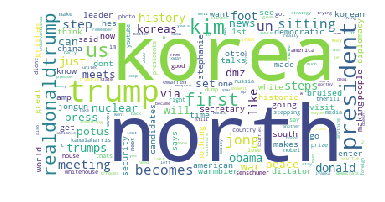

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white").generate_from_frequencies(frequency_dist)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Top 20 Unigrams

north 3693
korea 3421
trump 1948
president 1048
kim 706
realdonaldtrump 582
sitting 325
jong 324
meeting 283
step 283
just 238
trumps 230
history 223
foot 220
obama 214
donald 203
like 195
steps 191
nuclear 172
press 172


Text(0.5,0,'count')

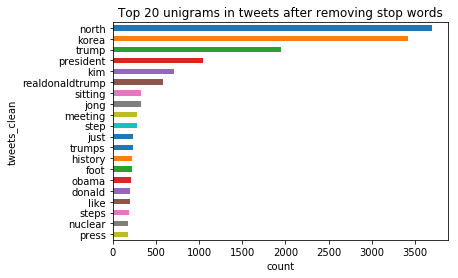

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df4['tweets_clean'], 20)
for word, freq in common_words:
    print(word, freq)
    
df7 = pd.DataFrame(common_words, columns = ['tweets_clean' , 'count'])
df7.groupby('tweets_clean').sum()['count'].sort_values(ascending=False).plot.barh().invert_yaxis()
plt.title('Top 20 unigrams in tweets after removing stop words')
plt.xlabel('count')

#### Bigrams

north korea 3289
kim jong 321
sitting president 268
president trump 202
president step 198
foot north 197
step north 178
donald trump 177
trump north 169
steps north 161
trump sitting 157
north koreas 156
trump meets 145
set foot 139
press secretary 137
meets kim 133
president set 131
trump president 116
trump steps 110
kim jongun 106


Text(0.5,0,'count')

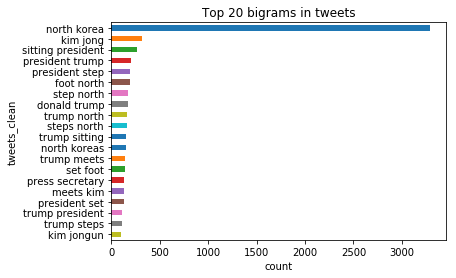

In [55]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df4['tweets_clean'], 20)
for word, freq in common_words:
    print(word, freq)
df8 = pd.DataFrame(common_words, columns = ['tweets_clean' , 'count'])
df8.groupby('tweets_clean').sum()['count'].sort_values(ascending=False).plot.barh().invert_yaxis()
plt.title('Top 20 bigrams in tweets')
plt.xlabel('count')

#### Trigrams

foot north korea 186
step north korea 168
steps north korea 156
trump north korea 151
president step north 139
trump sitting president 138
set foot north 131
president set foot 129
trump meets kim 122
sitting president step 102
trump steps north 99
sitting president set 95
north korea meeting 87
meets kim jong 83
north korea kim 81
north koreas kim 79
enter north korea 69
trump president step 66
visit north korea 66
north korea security 63


Text(0.5,0,'count')

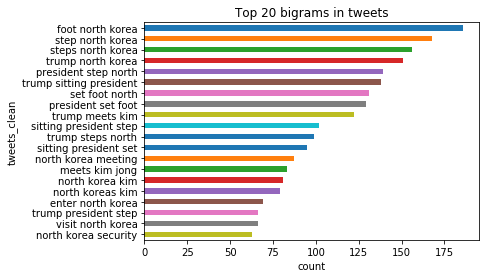

In [56]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df4['tweets_clean'], 20)
for word, freq in common_words:
    print(word, freq)
df9 = pd.DataFrame(common_words, columns = ['tweets_clean' , 'count'])
df9.groupby('tweets_clean').sum()['count'].sort_values(ascending=False).plot.barh().invert_yaxis()
plt.title('Top 20 bigrams in tweets')
plt.xlabel('count')

### Timeline of Tweets 

In [64]:
retweets = df4.sort_values(by=['Retweet Count', 'Followers'] , ascending=False)
retweets

,Created At,Followers,Following,Handle,Likes,Location,Message,Retweet Count,Tweet Favorite Count,User Description,...,word_count,unique word_count,char_count,subjectivity,polarity,subjectivity_range,polarity_range,hashtags,handles,User
2595,2019-06-30 17:40:24,1142482,248834,charliekirk11,26563,"Chicago, Illinois",Barack Obama was given the Nobel Peace Prize i...,2835,7397,Founder & President of @TPUSA Proud capitalist...,...,23,20,130,0.000000,0.000000,NaN,Neutral,,,charliekirk11
2914,2019-06-30 17:33:02,1047950,9363,tedlieu,40845,California,We should support diplomacy. I think it's fine...,997,3365,"Husband of Betty, the love of my life. Father ...",...,24,22,130,0.500000,0.416667,Objective,Positive,,potus,tedlieu
1544,2019-06-30 18:05:26,1142457,248834,charliekirk11,26563,"Chicago, Illinois",If Hillary Clinton was President we would have...,991,2946,Founder & President of @TPUSA Proud capitalist...,...,22,21,128,0.000000,0.000000,NaN,Neutral,,,charliekirk11
2348,2019-06-30 17:46:04,260567,35763,mmpadellan,145421,"Brooklyn, NY",There's a reason no other American President h...,322,898,"Proud papa. Perpetually pissed. #BlueWave2020,...",...,21,20,130,0.187500,0.031250,Objective,Positive,,,mmpadellan
1119,2019-06-30 18:16:07,164550,285,marklutchman,7693,"Philadelphia, PA",President Trump is the first sitting president...,314,1062,Writer - Former Army National Guardsman - 25 y...,...,22,19,131,0.333333,0.250000,Objective,Positive,,,marklutchman
3186,2019-06-30 17:27:24,75002,2722,KlasfeldReports,16894,"New York, NY",This is a passage from a United Nations human ...,305,424,"Reporter, @CourthouseNews: NYC+Int’l. RTs=What...",...,19,18,130,0.150000,-0.150000,Objective,Negative,,,klasfeldreports
2762,2019-06-30 17:36:28,85071,422,hale_razor,36214,Wherever Liberty is Threatened,44 lifts Cuba embargo and watches baseball gam...,285,566,Conservative politics humor. Satire. Snark. Sa...,...,20,18,130,0.200000,-0.200000,Objective,Negative,,,hale_razor
3090,2019-06-30 17:29:41,234743,1445,RadioFreeTom,54069,"Newport, RI",Today's humiliation in North Korea is yet anot...,283,900,"Professor, author on Russia, war, nukes, and ""...",...,19,19,132,0.500000,0.500000,Objective,Positive,,,radiofreetom
4317,2019-06-30 17:03:10,127089,1479,FrankFigliuzzi1,8849,"Tucson, AZ",POTUS makes history as first to say visiting l...,282,742,Former FBI Assistant Director; NBC News Nation...,...,21,21,129,0.541667,0.525000,Objective,Positive,,,frankfigliuzzi1
841,2019-06-30 18:22:12,297054,2614,GOPChairwoman,5737,NaN,"In 2017, Kamala Harris said: ""We must work to ...",246,618,"@GOP Chairwoman | Wife, mother of two",...,18,18,117,0.250000,0.250000,Objective,Positive,,,gopchairwoman


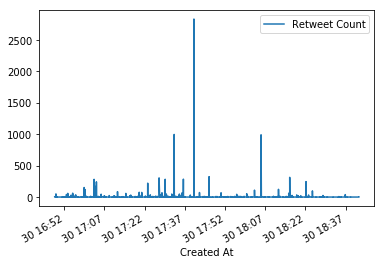

In [65]:
retweets.plot(x='Created At',y='Retweet Count')

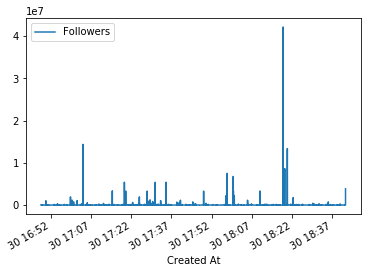

In [66]:
retweets.plot(x='Created At',y='Followers')

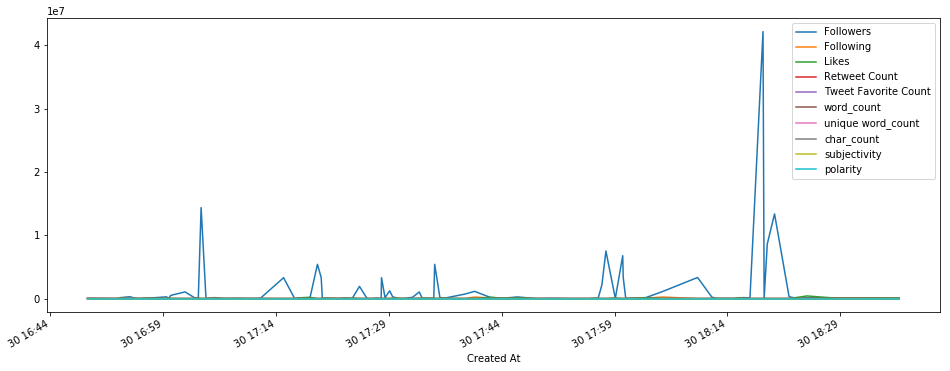

In [67]:
tweet_many = df4[df4['Retweet Count'] >= 10]
tweet_many.plot(x='Created At', figsize=(16, 6))